# SIR model

**SIR (Susceptible-Infectious-Recovered) model** is one of the most common and the simplest model structure to describe the transmission of diseases. We'll go through how the model is defined, and how we can implement them in Python. We also cover relevant epidemiological concepts such as epidemical threshold.


## Model definition

### Introduction

How can we mathematically model the dynamics of disease transmission? The most common approach is to use the **compartmental models**, which we stratify the population into subgroups (compartments) and describe the changes of incoming and outgoing individuals between each compartments.

Although there could be numerous ways to setup compartments, let us start with the **SIR (Susceptible-Infectious-Recovered) model** which is one of the most common model with the simplest structure. In the SIR model, the population is stratified into three compartments:
- **S-compartment**: susceptible to new infections
- **I-compartment**: currently infected
- **R-compartment**: have recovered from infection and acquired immunity


### Various types of models

There are variations in how we mathematically represent or computationally implement the SIR model. Here are some of the perspectives that we can classify the models into. 

**Deterministic vs. Stochastic**
- **Deterministic models**: The results are deterministic, meaning that same values would be obtained even if the calculation is repeated. Useful to understand general dynamics of epidemic. Typically represented by difference or differential equations.
- **Stochastic models**: Incorporates uncertainty/randomness. Even with the same parameter values, the epidemic could either take off or extinct due to the stochasticity. If we run simulations for a sufficient enough iterations and take its mean, it should provide a close value to that was obtained from the deterministic model.

**Discrete time vs. Continuous time**
- **Discrete time model**: The timesteps are represented in discrete steps ($t=0,1,2,\cdots$).
- **Continuous time mode**: The model assumes that the changes in the system occur continuously over time.

**Mixing assumptions**
- **Homogeneous mixing model**: The model assumes that all of the individuals have a equal chance/probability of contacting with each other.
- **Heterogeneous mixing model**: Unlike homogeneous mixing, the contact patterns are quantitatively/qualitatively different in each individuals. For example, there could be some people who meets 20 people a day, whereas some people only meets 3. This is what is often called as the "network model," which we will cover in the later section.


### Discrete time SIR model

At a discrete time step (e.g., $t=0,1,2,\cdots$), the SIR model is epresented using a set of difference equations as follows,


$$
\begin{equation*}
   \left\{
    \begin{aligned}
S_{t+1} &= S_t - \beta \frac{I_t}{N} S_t \\
I_{t+1} &= I_t + \beta \frac{I_t}{N} S_t - \mu I_t \\
R_{t+1} &= R_t + \mu I_t
      \end{aligned}
   \right.
   \tag{1}
\end{equation*}
$$

where each symbols represent:
- $ S_t $: Number of susceptible individuals at time $ t$ 
- $ I_t $: Number of infected individuals at time $ t$ 
- $ R_t $: Number of recovered individuals at time $ t$ 
- $ N = S_t + I_t + R_t $: Total population
- $ \beta $: Rate of infection rate per contact
- $ \mu $: Rate of recovery.

This is a deterministic model in a discrete time step with the assumption of homogeneous mixing.

Note that the symbols of the parameters $\beta$ and $\mu$ could be different depending on the literature. We'll stick to this expression in this section unless otherwise noted.

### Continuous time SIR model

Let us think of the continuous time version of the SIR model, which can be derived from the set of difference equations above.

For a small time step $\Delta t$, the change in a variable can be approximated by the difference between successive time steps. For any variable $X$, the following approximation holds:

$$
\frac{dX}{dt} \approx \frac{X_{t+1} - X_t}{\Delta t}.
$$

If we assume $\Delta t = 1$, the difference equations become:

$$
\begin{aligned}
    \frac{S_{t+1} - S_t}{\Delta t} &\approx -\beta \frac{I_t}{N} S_t \\
    \frac{I_{t+1} - I_t}{\Delta t} &\approx \beta \frac{I_t}{N} S_t - \mu I_t \\
    \frac{R_{t+1} - R_t}{\Delta t} &\approx \mu I_t
\end{aligned}
$$

Taking the limit as $\Delta t \to 0$, the left hand side of the equations becomes the derivative. Now, denoting the number of individuals in each compartments at time $t$ in a continuous timestep as $ S(t) $, $ I(t) $, and $ R(t) $, respectively, we get a set of differential equations:

$$
\begin{equation*}
   \left\{
    \begin{aligned}
    \frac{dS(t)}{dt} &= -\beta \frac{I(t)}{N}S(t) \\
    \frac{dI(t)}{dt} &= \beta \frac{I(t)}{N}S(t) - \mu I(t) \\
    \frac{dR(t)}{dt} &= \mu I(t)
      \end{aligned}
   \right.
   \tag{2}
\end{equation*}
$$

This is a deterministic model in a continuous time step with the assumption of homogeneous mixing.


### Solving SIR model

SIR model is a nonlinear dynamical system and thus cannot be solved analytically for most settings. However, under specific assumptions, the approximate solution can analytically be derived as follows for the **very initial phase of the outbreak**.

In the early phase of an epidemic, only a small number of individuals are infected. Thus, the following approximation holds:
$$
S(t) \approx S(0) \approx N
$$
where $N$ is the total population.

With the assumption above on the susceptible population, the equation for $I(t)$ becomes:
$$
\begin{aligned}
  \frac{dI(t)}{dt}
    &= \beta \frac{I(t)}{N}S(t) - \mu I(t) \\
    &\approx \beta \frac{I(t)}{N}N - \mu I(t) \\
    &= (\beta - \mu) I(t)
\end{aligned}
$$

Since this is a first-order linear differential equation, we can solve it as
$$
\begin{aligned}
  \frac{1}{I(t)}\frac{dI(t)}{dt} &= (\beta - \mu) \\
  \int_{I(0)}^{I(t)} \frac{1}{I}dI &= \int_0^t (\beta - \mu)  {dt} \\
  \bigg[ \ln I \bigg]_{I(0)}^{I(t)} &= \bigg[ (\beta - \mu) u \bigg]_0^t \\
  \ln I(t) - \ln I(0) &= (\beta - \mu) t \\
  \ln \frac{I(t)}{I(0)} &= (\beta - \mu) t \\
\end{aligned}
$$

Taking exponent of both sides,
$$
\begin{aligned}
  \frac{I(t)}{I(0)} &= \exp \bigg( (\beta - \mu) t \bigg) \\
\end{aligned}
$$

Thus we get
$$
\begin{aligned}
  I(t) &= I(0) \exp \bigg( (\beta - \mu) t \bigg) \tag{3}
\end{aligned}
$$
where $I(0)$ is the initial number of infected individuals.

Note that this approximation only holds for
- the **initial phase** of epidemic
- where almost **entire population is susceptible**

### Epidemic threshold
Equation (3) is a exponential function and its behaviour depends on the the power it has:
- **Exponential Growth:** If $\beta - \mu > 0$, the infection grows exponentially.
- **Exponential Decay:** If $\beta - \mu < 0$ (or $\frac{\beta}{\mu} < 1$), the infection decays (decreases) exponentially.

Due to the threshold property of determining the growth of epidemic, we call the following relationship as the **epidemic threshold**:
$$
\beta - \mu > 0 \iff R_0 = \frac{\beta}{\mu} > 1
$$

The fractional form $\frac{\beta}{\mu}$ is also known as the **basic reproduction number** $R_0$.

### Basic reproduction number

Basic reproduction number $R_0$ (pronounced "R-naught") is the average number of secondary infections made by a single infected case when the population is fully susceptible. If the offspring distribution is given or infered, $R_0$ can be calculated as the first moment (mean) of the distribution.

In the homogeneous SIR model, $R_0$ is expressed as:
$$
R_0 = \frac{\beta}{\mu}
$$


For respiratory emerging diseases including SARS-CoV-2, the offspring distribution is known to be modeled well by the negative binomial distribution $\textrm{NegBin}(R_0, k)$ where $k$ is the dispersion parameter. Dispersion parameter $k$ for SARS-CoV-2 is known to be very small (around $k \approx 0.1$), which indicates the highly heterogeneous distribution (i.e., overdispersion) of the number of secondary transmissions.

Also note that the formula for $R_0$ is different when we assume heterogeneous mixing (in the network).


In [659]:
def calc_R0_homogeneous(beta, gamma):
    return beta/gamma

In [ ]:
calc_R0_homogeneous(beta=0.4, gamma=0.2)

2.0

## Implementations

Let's try implementing the SIR model in Python. Specifically, we will code
- deterministic model with homogeneous mixing assumption
- stochastic model with homogeneous mixing assumption

and observe that the two models provide approximately same result in average.

### Notebook setup

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from tqdm import tqdm, trange
import cmocean

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = False 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

### Paremeters
Here are the parameters that we use throughout the simulations.

In [ ]:
params = {
    "N": 50000, # Total population size
    "n_steps": 1000, # Number of time steps
    "beta": 0.2, # Infection rate
    "gamma": 0.1, # Recovery rate
    "n_stoc_sim": 20, # Number of stochastic simulations
}
params["I_initial"] = 20 # Initial number of infected individuals
params["R_initial"] = 0 # Initial number of recovered individuals
params["S_initial"] = params["N"] - (params["I_initial"] + params["R_initial"])
params

{'N': 50000,
 'n_steps': 1000,
 'beta': 0.2,
 'gamma': 0.1,
 'n_stoc_sim': 20,
 'I_initial': 20,
 'R_initial': 0,
 'S_initial': 49980}

### Deterministic model

In [661]:
def SIR_model(S_initial=1000, I_initial=1, R_initial=0, n_steps=1000, beta=0.8, gamma=0.4):
    """
    Simulate SIR model.

    Parameters
    ----------
    S_initial : int
        Initial number of Susceptible individuals.
    I_initial : int
        Initial number of Infected individuals.
    R_initial : int
        Initial number of Recovered individuals.
    n_steps : int
        Number of time steps to simulate.
    beta : float
        Infection rate (probability of infection on contact)
    gamma : float
        Recovery rate (probability of recovery per unit time)
    
    Returns
    -------
    S_dict : dict
        Dictionary with number of susceptible individuals at each time step.
        {t: S_t, ... }
    I_dict : dict
        Dictionary with number of infected individuals at each time step.
        {t: I_t, ... }
    R_dict : dict
        Dictionary with number of recovered individuals at each time step.
        {t: R_t, ... }
    """

    # Set S,I,R to initial values
    S = S_initial
    I = I_initial
    R = R_initial

    # N is always constant
    N = S+I+R

    # Initialize dictionaries to store values
    # {t: S_t, ... } etc.
    # t=0 is the initial state
    S_dict = {0: S}
    I_dict = {0: I}
    R_dict = {0: R}

    # Start simulation from t=1 to t=n_steps
    for t in range(1, n_steps+1):

        # Calculate number of individuals for each compartment at next time step
        S_new = S - S*beta*(I/N)
        I_new = I + S*beta*(I/N) - gamma*I
        R_new = R + gamma*I

        # Store values
        S_dict[t] = S_new
        I_dict[t] = I_new
        R_dict[t] = R_new

        # Update values for next time step
        S = S_new
        I = I_new
        R = R_new

    return S_dict, I_dict, R_dict

In [751]:
S_determ, I_determ, R_determ = SIR_model(
    S_initial=params["S_initial"],
    I_initial=params["I_initial"],
    R_initial=params["R_initial"],
    n_steps=params["n_steps"],
    beta=params["beta"],
    gamma=params["gamma"]
)

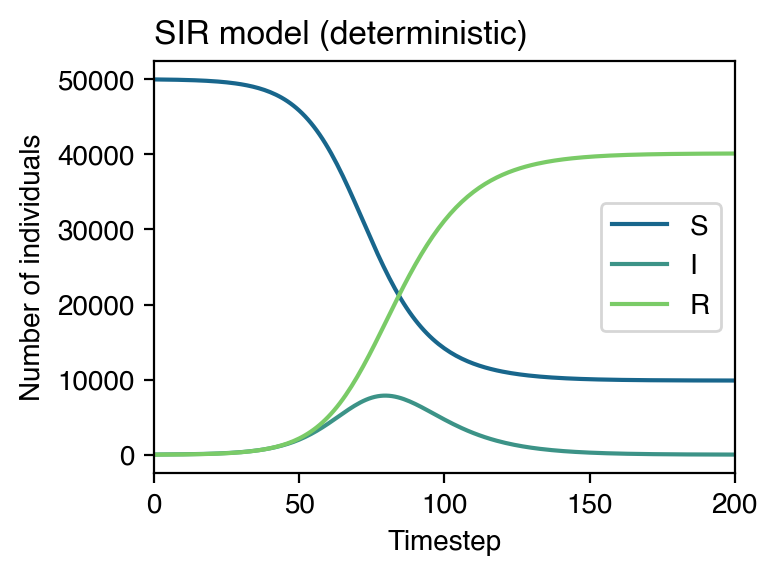

In [752]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

# Color mapping
cmap = cmocean.cm.haline
colors = [cmap(0.3), cmap(0.5), cmap(0.75)]

compartments_to_plot = ["S", "I", "R"]

data_determ = {
	"S": S_determ,
	"I": I_determ,
	"R": R_determ
}

for idx, compartment in enumerate(compartments_to_plot):
	ax.plot(
		data_determ[compartment].keys(),
		data_determ[compartment].values(),
		color=colors[idx],
		label=f'{compartment}'
	)
ax.set_title("SIR model (deterministic)", loc='left')
ax.set_xlabel("Timestep")
ax.set_ylabel("Number of individuals")

ax.set_xlim(0,200)

ax.legend()

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()

### Stochastic model

In [753]:
def SIR_model_stochastic(S_initial=1000, I_initial=1, R_initial=0, n_steps=1000, beta=0.8, gamma=0.4):
    """
    Simulate SIR model.

    Parameters
    ----------
    S_initial : int
        Initial number of Susceptible individuals.
    I_initial : int
        Initial number of Infected individuals.
    R_initial : int
        Initial number of Recovered individuals.
    n_steps : int
        Number of time steps to simulate.
    beta : float
        Infection rate (probability of infection on contact)
    gamma : float
        Recovery rate (probability of recovery per unit time)
    
    Returns
    -------
    S_dict : dict
        Dictionary with number of susceptible individuals at each time step.
        {t: S_t, ... }
    I_dict : dict
        Dictionary with number of infected individuals at each time step.
        {t: I_t, ... }
    R_dict : dict
        Dictionary with number of recovered individuals at each time step.
        {t: R_t, ... }
    """

    # Set S,I,R to initial values
    S = S_initial
    I = I_initial
    R = R_initial

    # N is always constant
    N = S+I+R

    # Initialize dictionaries to store values
    # {t: S_t, ... } etc.
    # t=0 is the initial state
    S_dict = {0: S}
    I_dict = {0: I}
    R_dict = {0: R}

    # Start simulation from t=1 to t=n_steps
    for t in range(1, n_steps+1):

        # Calculate number of individuals for each compartment at next time step
        lambda_t = beta*(I/N)

        S_diff = np.random.binomial(S, lambda_t)
        I_diff = np.random.binomial(I, gamma)

        S_new = S - S_diff
        I_new = I + S_diff - I_diff
        R_new = R + I_diff

        # Store values
        S_dict[t] = S_new
        I_dict[t] = I_new
        R_dict[t] = R_new

        # Update values for next time step
        S = S_new
        I = I_new
        R = R_new

    return S_dict, I_dict, R_dict

In [754]:
# This is a single determination
S_stoc, I_stoc, R_stoc = SIR_model_stochastic(
    S_initial=params["N"],
    I_initial=params["I_initial"],
    R_initial=params["R_initial"],
    n_steps=params["n_steps"],
    beta=params["beta"],
    gamma=params["gamma"]
)

In [755]:
# We'll repeat the stochastic simulation for multiple times.

# Each determination will be added to the array
S_stoc_dict, I_stoc_dict, R_stoc_dict = [], [], []

for _ in trange(params["n_stoc_sim"]):
    S_stoc, I_stoc, R_stoc = SIR_model_stochastic(
		S_initial=params["S_initial"],
		I_initial=params["I_initial"],
		R_initial=params["R_initial"],
		n_steps=params["n_steps"],
		beta=params["beta"],
		gamma=params["gamma"]
    )

    S_stoc_dict.append(S_stoc)
    I_stoc_dict.append(I_stoc)
    R_stoc_dict.append(R_stoc)


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 484.31it/s]


In [756]:
# Reorganize data into a list of dictionaries, so that it can be converted into a dataframe.
data_stoc_sim = []
for id, _ in enumerate(S_stoc_dict):
    for t, _ in S_stoc_dict[id].items():
        data_stoc_sim.append(
            {
                'iter': id,
                'time': t,
                'S': S_stoc_dict[id][t],
                'I': I_stoc_dict[id][t],
                'R': R_stoc_dict[id][t]
            }
        )

In [757]:
df_stochastic = pd.DataFrame(data_stoc_sim)
df_stochastic

,iter,time,S,I,R
0,0,0,49980,20,0
1,0,1,49977,22,1
2,0,2,49975,22,3
3,0,3,49970,26,4
4,0,4,49961,32,7
...,...,...,...,...,...
20015,19,996,9610,0,40390
20016,19,997,9610,0,40390
20017,19,998,9610,0,40390
20018,19,999,9610,0,40390


In [758]:
# Because we are dealing with multiple realizations, we'll calculate the interquantile range (25-percentile and 75-percentile)
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

In [759]:
# Groupby "time" and get the median and IQR
df_stochastic.groupby('time')['S'].agg(["median", q25, q75])

,median,q25,q75
time,,,
0,49980.0,49980.00,49980.0
1,49976.0,49974.00,49977.0
2,49972.0,49968.00,49973.0
3,49967.0,49964.00,49969.0
4,49962.0,49960.00,49964.0
...,...,...,...
996,9904.5,9785.25,10027.5
997,9904.5,9785.25,10027.5
998,9904.5,9785.25,10027.5


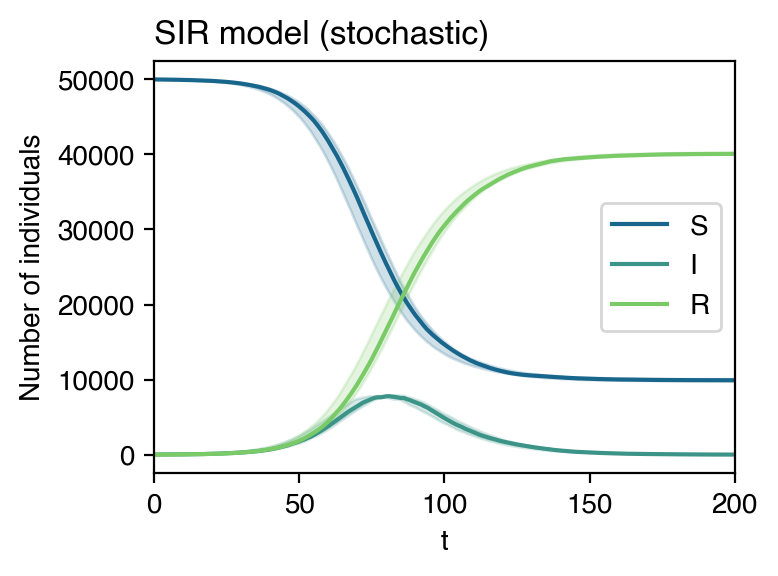

In [760]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

compartments_to_plot = ["S", "I", "R"]

for idx, compartment in enumerate(compartments_to_plot):

	quantiles = df_stochastic.groupby('time')[compartment].agg(["median", q25, q75])

	# Median
	ax.plot(
		quantiles.index,
		quantiles['median'],
		color=colors[idx],
		label=f'{compartment}'
	)

	# IQR
	ax.fill_between(
		quantiles.index,
		quantiles['q25'],
		quantiles['q75'],
		color=colors[idx],
		alpha=0.2,
	)

ax.set_title("SIR model (stochastic)", loc='left')
ax.set_xlabel("t")
ax.set_ylabel("Number of individuals")

ax.set_xlim(0,200)

ax.legend()


fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()

### Comparison

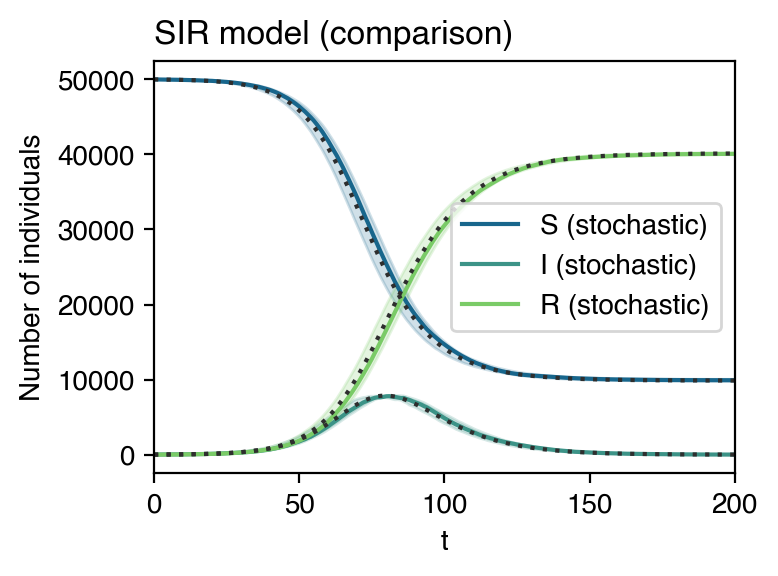

In [761]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

compartments_to_plot = ["S", "I", "R"]

# === Stochastic simulation ===
for idx, compartment in enumerate(compartments_to_plot):

	quantiles = df_stochastic.groupby('time')[compartment].agg(["median", q25, q75])

	# Median
	ax.plot(
		quantiles.index,
		quantiles['median'],
		color=colors[idx],
		label=f'{compartment} (stochastic)'
	)

	# IQR
	ax.fill_between(
		quantiles.index,
		quantiles['q25'],
		quantiles['q75'],
		color=colors[idx],
		alpha=0.2,
	)

# === Deterministic result ===
for idx, compartment in enumerate(compartments_to_plot):
	
	ax.plot(
		data_determ[compartment].keys(),
		data_determ[compartment].values(),
		linestyle=(0,(1,2)),
		color="#2e2e2e",
	)

ax.set_title("SIR model (comparison)", loc='left')
ax.set_xlabel("t")
ax.set_ylabel("Number of individuals")

ax.set_xlim(0,200)


ax.legend()

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()

## Epidemic threshold

### Final size equation

#### Definition
$$
Z = 1 - \exp (- R_0 Z)
$$

#### Derivation

We start with the SIR model equations:
$$
\begin{aligned}
\frac{dS}{dt} &= -\beta \frac{S I}{N}, \\
\frac{dI}{dt} &= \beta \frac{S I}{N} - \gamma I, \\
\frac{dR}{dt} &= \gamma I,
\end{aligned}
$$
with $N = S(t) + I(t) + R(t)$ constant.

**Step 1: Relate $dR$ and $d$S**

Notice that $I$ appears in both $\frac{dS}{dt}$ and $\frac{dR}{dt}$. By eliminating $I$, we form a differential relation between $R$ and $S$.

We have:
$$
\frac{dR}{dt} = \gamma I \quad \text{and} \quad \frac{dS}{dt} = -\beta \frac{S I}{N}.
$$
Taking the ratio:
$$
\frac{dR}{dS} = \frac{\frac{dR}{dt}}{\frac{dS}{dt}} = \frac{\gamma I}{-\beta \frac{S I}{N}} = -\frac{\gamma N}{\beta S}.
$$
This simplifies to:
$$
\frac{dR}{dS} = -\frac{N}{R_0 S},
$$
where the basic reproduction number is defined as:
$$
R_0 = \frac{\beta}{\gamma}.
$$

**Step 2: Integrate the Relation**

Rearrange the equation:
$$
dR = -\frac{N}{R_0} \frac{dS}{S}.
$$
Integrate both sides from the initial state to the final state:
- At $t=0$: $R(0)=0$ and $S(0)=S_0$.
- As $t \to \infty$: $R(\infty)=R_\infty$ and $S(\infty)=S_\infty$.

Thus, integrating:
$$
\int_{0}^{R_\infty} dR = -\frac{N}{R_0} \int_{S_0}^{S_\infty} \frac{dS}{S}.
$$

The integrals yield:
$$
R_\infty = -\frac{N}{R_0} \left[ \ln S \right]_{S_0}^{S_\infty} = -\frac{N}{R_0} \left( \ln S_\infty - \ln S_0 \right).
$$
This can be rewritten as:
$$
R_\infty = \frac{N}{R_0} \ln \frac{S_0}{S_\infty}.
$$

**Step 3: Express the Final Size in Terms of $S_\infty$**

Since the total population is conserved, we have:
$$
N = S_\infty + I(\infty) + R_\infty.
$$
At the end of the epidemic, $I(\infty) \approx 0$, so:
$$
R_\infty = N - S_\infty.
$$
Substitute this into the previous equation:
$$
N - S_\infty = \frac{N}{R_0} \ln \frac{S_0}{S_\infty}.
$$

**Step 4: Simplify for the Case $S_0 \approx N$**

Often, we assume that almost the entire population is susceptible at the start, so $S_0 \approx N$. Then:
$$
N - S_\infty = \frac{N}{R_0} \ln \frac{N}{S_\infty}.
$$
Dividing through by $N$ gives:
$$
1 - \frac{S_\infty}{N} = \frac{1}{R_0} \ln \frac{N}{S_\infty}.
$$

**Final Size Equation**

Defining $s_\infty = \frac{S_\infty}{N}$ (the fraction of the population that remains susceptible at the end), the equation becomes:
$$
1 - s_\infty = \frac{1}{R_0} \ln \frac{1}{s_\infty},
$$
or equivalently:
$$
s_\infty = e^{-R_0 (1-s_\infty)}.
$$

This is the final size equation for the SIR model.


### Calculation

In [ ]:
from scipy.optimize import fsolve
from scipy.special import lambertw

def final_size_equation(Z, R0):
    """
    Equation: Z = exp(-R0*(1-Z))
    Rearranged as: f(Z) = Z - exp(-R0*(1-Z)) = 0
    
    Parameters:
    Z (float): Variable Z.
    R0 (float): Parameter R0.
    
    Returns:
    float: Value of the function f(Z).
    """
    return Z - np.exp(-R0*(1-Z))

def calc_Z_analytically(R0):
    """
    Compute the solution of the equation Z = exp(-R0*(1-Z)) using the Lambert W function.
    
    Parameters:
    R0 (float or numpy.ndarray): The basic reproduction number(s) R0.
    
    Returns:
    float or numpy.ndarray: The corresponding value(s) of Z.
    """
    # Compute u = -W(-R0 * exp(-R0)) and then Z = u/R0.
    # We take the real part since the Lambert W function may return a complex number.
    return -lambertw(-R0 * np.exp(-R0)).real / R0

def calc_Z_numerically(R0):
    """
    Solve the equation numerically for a given R0.
    
    For R0 <= 1, the only solution is Z = 1.
    For R0 > 1, we use fsolve with an initial guess chosen to converge
    to the nontrivial solution (i.e. Z < 1).
    
    Parameters:
    R0 (float): The parameter R0.
    
    Returns:
    float: The numerical solution for Z.
    """
    if R0 <= 1:
        return 1.0  # Only trivial solution exists.
    else:
        # Use an initial guess close to 0 (e.g. 0.1) so that the solver converges
        # to the nontrivial solution.
        sol, = fsolve(final_size_equation, x0=0.1, args=(R0,))
        return sol

In [ ]:
# Define a range of R0 values.
R0_values = np.arange(0.1, 4, 0.005)
# Compute Z for each R0.
Z_values = np.array([calc_Z_numerically(R0) for R0 in R0_values])
Z_values_analytical = np.array([calc_Z_analytically(R0) for R0 in R0_values])

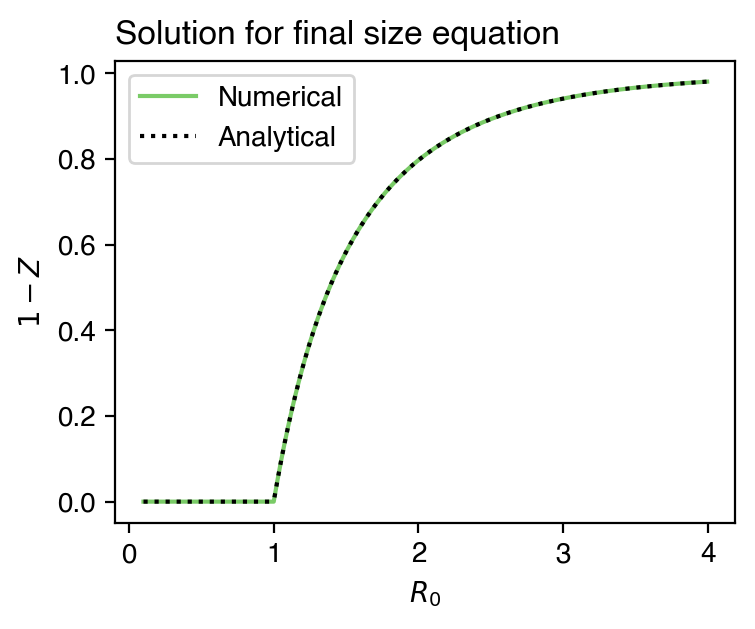

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

ax.plot(
	R0_values,
	1-Z_values,
    color=colors[2],
	label='Numerical'
)
ax.plot(
	R0_values,
	1-Z_values_analytical,
	':',
    color='black',
    label='Analytical'
)

ax.set_xlabel(r'$R_0$')
ax.set_ylabel(r'$1-Z$')
ax.set_title(r'Solution for final size equation', loc='left')

ax.legend()

plt.show()


### Calculating threshold in simulation

In [762]:
beta_list = np.arange(0,0.4,0.005)

In [763]:
data_final_size_determ = []

for beta in beta_list:
	_, _, R_dict = SIR_model(
		S_initial=params["S_initial"],
		I_initial=params["I_initial"],
		R_initial=params["R_initial"],
		n_steps=params["n_steps"],
		beta=beta,
		gamma=params["gamma"]
	)
	final_size = list(R_dict.values())[-1]
	data_final_size_determ.append(
		{
			'final_size': final_size,
			'beta': beta,
			'gamma': params["gamma"]
		}
	)
	# final_size_dict_determ[beta] = final_size / params["N"]

In [764]:
df_final_size_determ = pd.DataFrame(data_final_size_determ)
df_final_size_determ['final_size'] = df_final_size_determ['final_size'] / params["N"]

In [765]:
df_final_size_determ['R0'] = df_final_size_determ.apply(
    lambda d:
    	calc_R0_homogeneous(beta = d['beta'], gamma = d['gamma']),
    axis=1
)

In [766]:
# df_final_size_determ['R0'] = df_final_size_determ['beta'] / df_final_size_determ['gamma']

In [767]:
df_final_size_determ

,final_size,beta,gamma,R0
0,0.000400,0.000,0.1,0.00
1,0.000421,0.005,0.1,0.05
2,0.000444,0.010,0.1,0.10
3,0.000471,0.015,0.1,0.15
4,0.000500,0.020,0.1,0.20
...,...,...,...,...
75,0.979013,0.375,0.1,3.75
76,0.980273,0.380,0.1,3.80
77,0.981459,0.385,0.1,3.85
78,0.982573,0.390,0.1,3.90


In [768]:
data_final_size_stoc = []

# N = 50000
for beta in tqdm(beta_list):
	for it in range(params["n_stoc_sim"]):
		_, _, R_dict = SIR_model_stochastic(
			S_initial=params["S_initial"],
			I_initial=params["I_initial"],
			R_initial=params["R_initial"],
			n_steps=params["n_steps"],
			beta=beta,
			gamma=params["gamma"]
		)
		final_size = list(R_dict.values())[-1]
		data_final_size_stoc.append(
			{
				'iter': it,
				'final_size': final_size,
				'beta': beta,
				'gamma': params["gamma"]
			}
		)
	# final_size_dict_stoc[beta] = final_size / params["N"]

100%|███████████████████████████████████████████| 80/80 [00:02<00:00, 30.92it/s]


In [769]:
df_final_size_stoc = pd.DataFrame(data_final_size_stoc)
df_final_size_stoc['final_size'] = df_final_size_stoc['final_size'] / params["N"]

In [770]:
df_final_size_stoc['R0'] = df_final_size_stoc.apply(
    lambda d:
    	calc_R0_homogeneous(beta = d['beta'], gamma = d['gamma']),
    axis=1
)

In [771]:
summary_df_final_size_stoc = df_final_size_stoc.groupby('R0')['final_size'].agg(['mean', q25, q75])

### Comparison

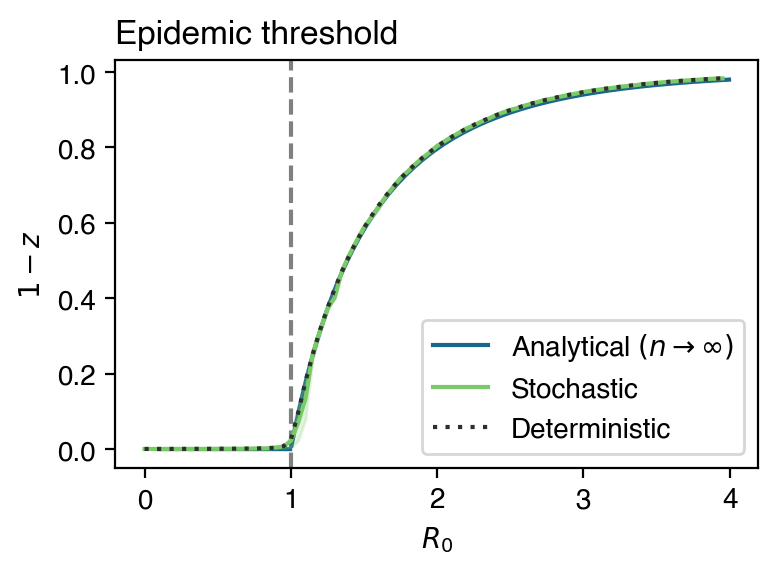

In [775]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

# Analytical solution when n-> \infty
ax.plot(R0_values, 1-Z_values_analytical, color=colors[0], label=r'Analytical $( n \rightarrow \infty)$', zorder=-1)

# Stochastic
ax.fill_between(
    summary_df_final_size_stoc.index,
	summary_df_final_size_stoc['q25'],
	summary_df_final_size_stoc['q75'],
	color=colors[2],
    alpha=0.2,
)
ax.plot(
	summary_df_final_size_stoc.index,
	summary_df_final_size_stoc['mean'],
	color=colors[2],
    label="Stochastic",
)

# Deterministic
ax.plot(
	df_final_size_determ['R0'],
	df_final_size_determ['final_size'],
    color="#2e2e2e",
    label="Deterministic",
    linestyle=(0,(1,2))
)

# R0=1 line
ax.axvline(x=1, color='gray', linestyle='--', zorder=-10)



ax.set_title("Epidemic threshold", loc='left')
ax.set_xlabel("$R_0$")
ax.set_ylabel(r"$1-z$")
ax.legend()

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()